In [75]:
import os
import pandas as pd
from sklearn.neighbors import KDTree
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [76]:
df = pd.read_csv('dataset_v0/color_data.csv')

In [77]:
print(len(df))
# use only top three colors
# TOP_N = 3
TOP_N = 5
new_df = pd.DataFrame()
for path in df['path'].unique():
    temp = df[df['path'] == path].sort_values('weight', ascending=False).head(TOP_N)
    new_df = pd.concat([new_df, temp])
df = new_df
print(len(df))

7576
4735


In [78]:
leaf_size = int(len(df) * 0.01)
weights = np.array([2, 10, 10])
data = df[['color_l', 'color_a', 'color_b']].values * weights
tree = KDTree(data, leaf_size=leaf_size, metric='euclidean')

[178 139 131]


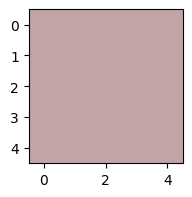

In [79]:
# light blue
# target_rgb = np.array([20, 200, 255])

# light purple
# target_rgb = np.array([200, 200, 255])

# dark green
# target_rgb = np.array([30, 54, 29])

# puce green
# target_rgb = np.array([63, 71, 34])

# neon yellow
# target_rgb = np.array([255, 247, 0])

# light maroon
target_rgb = np.array([193, 164, 165])

target_lab = cv2.cvtColor(np.uint8([[target_rgb]]), cv2.COLOR_RGB2LAB)[0][0]
print(target_lab)
target_square = np.full((5, 5, 3), target_rgb, dtype=np.uint8)
fig = plt.figure(figsize=(2, 2)) 
plt.imshow(target_square)

/var/folders/d1/0dgw1b0x40d0mwh5qcfsyx7c0000gq/T/ipykernel_95917/2203734280.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


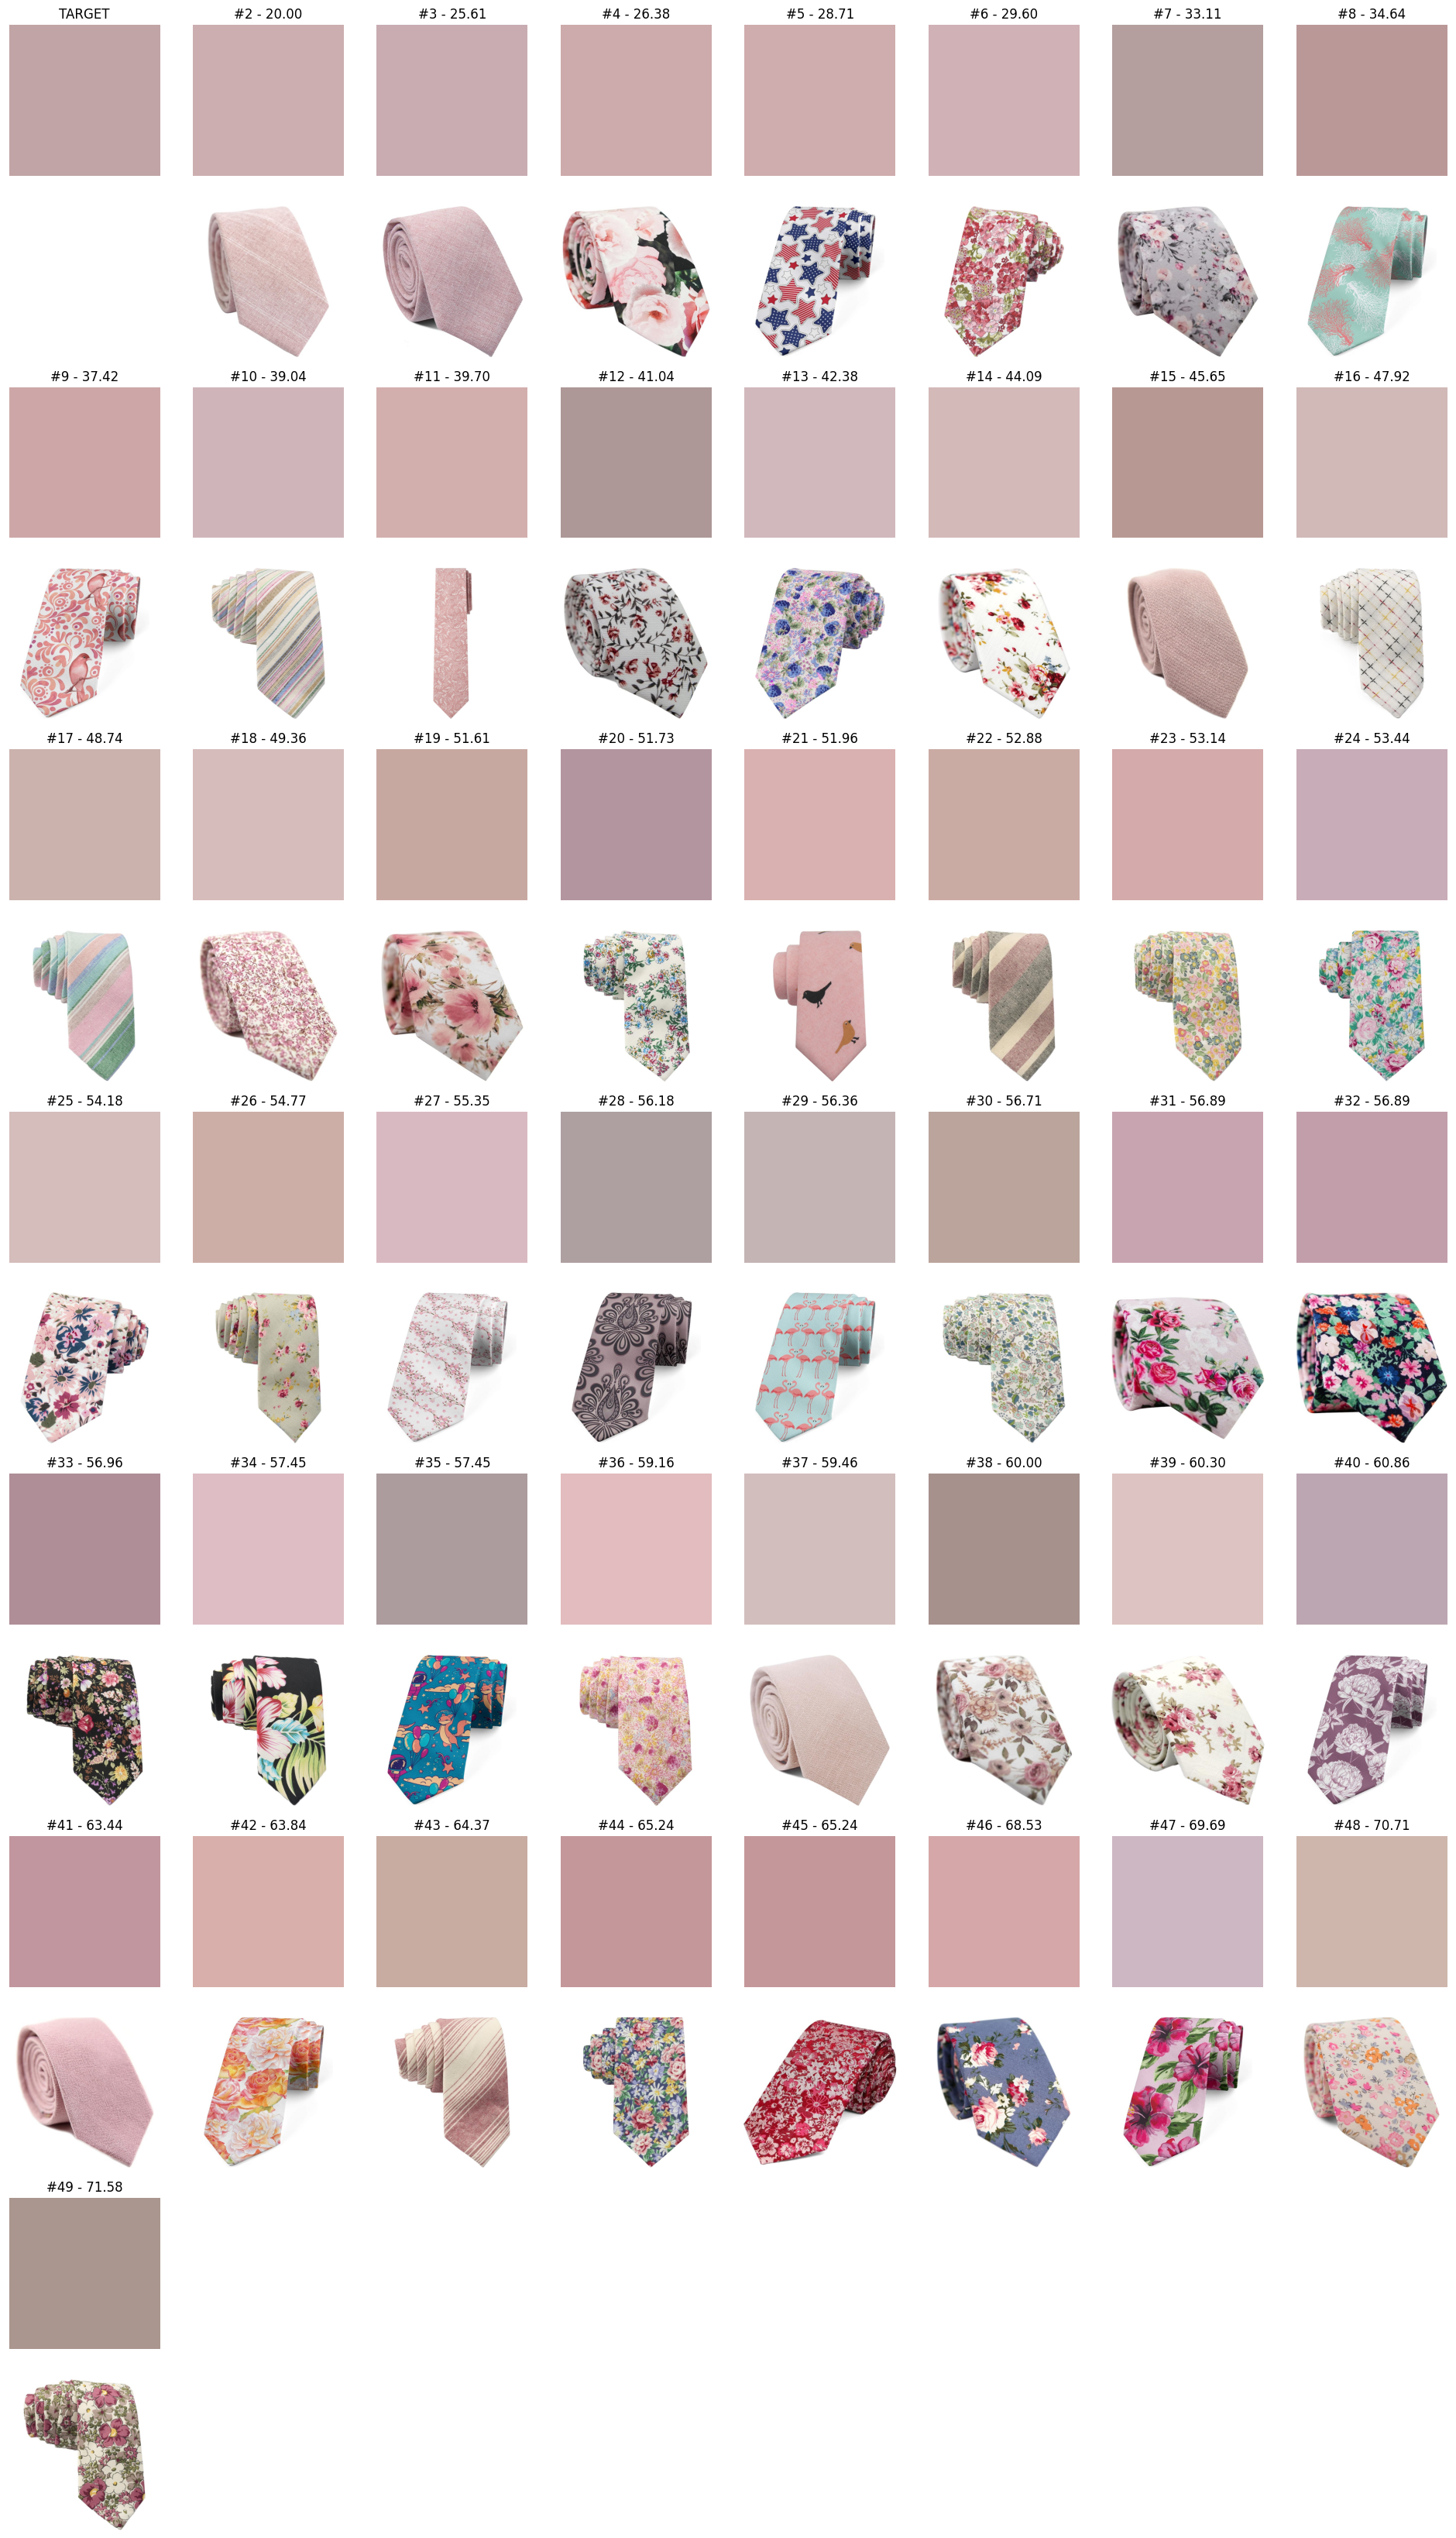

In [80]:
K = 65
N = 8

# fig = plt.figure(figsize=(2, 2)) 
# plt.imshow(square)
# plt.axis('off')

dist, ind = tree.query([target_lab * weights], k=K)
dist = dist[0]
ind = ind[0]
paths = df.iloc[ind].path.values

used_paths = []
remove_indices = []
for i, path in enumerate(paths):
    if path in used_paths:
        remove_indices.append(i)
    else:
        used_paths.append(path)
dist = np.delete(dist, remove_indices)
ind = np.delete(ind, remove_indices)
paths = np.delete(paths, remove_indices)

L = len(paths) + 1
cols = N
rows = ((L // N) + int(L % N > 0)) * 2
Z = 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*Z, rows*Z))
# fig = plt.figure(figsize=(20, 12)) 

axs[0, 0].imshow(target_square)
axs[0, 0].set_title('TARGET')

for i in range(1, L):
    row_i = (i // cols) * 2
    col_i = i % cols

    lab = data[ind[i-1]] / weights
    square = np.full((5, 5, 3), lab, dtype=np.uint8)
    square = cv2.cvtColor(square, cv2.COLOR_LAB2RGB)
    color_dist = np.linalg.norm(weights*target_lab-weights*lab)
    axs[row_i, col_i].set_title(f'#{i+1} - {color_dist:.2f}')
    axs[row_i, col_i].imshow(square)

    img = cv2.imread(df.iloc[ind[i-1]].path)
    axs[row_i+1, col_i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for row_i in range(rows):
    for col_i in range(cols):
        axs[row_i, col_i].axis('off')
fig.show()
fig.savefig('output.png', bbox_inches='tight')

In [81]:
rows, cols, L

(14, 8, 49)